A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

## Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

## Cargamos el Dataset

In [66]:
#importamos librerias
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

In [40]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


## Data Analysis - Data Wrangling

#### dtypes: float64(1), int64(29), object(5) --->nos interesa cambiar las columnas de tipo objeto

#### No tenemos columnas duplicadas, ni NaN

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Team                        16 non-null     object 
 1   Goals                       16 non-null     int64  
 2   Shots on target             16 non-null     int64  
 3   Shots off target            16 non-null     int64  
 4   Shooting Accuracy           16 non-null     object 
 5   % Goals-to-shots            16 non-null     object 
 6   Total shots (inc. Blocked)  16 non-null     int64  
 7   Hit Woodwork                16 non-null     int64  
 8   Penalty goals               16 non-null     int64  
 9   Penalties not scored        16 non-null     int64  
 10  Headed goals                16 non-null     int64  
 11  Passes                      16 non-null     int64  
 12  Passes completed            16 non-null     int64  
 13  Passing Accuracy            16 non-nu

In [42]:
#creamos una funcion para cambiarlas
def cambio_tipo(columna):
    df[columna] = df[columna].apply(lambda x: float(x[:-1]))


In [43]:
cambio_tipo("Shooting Accuracy")
cambio_tipo("% Goals-to-shots")
cambio_tipo("Passing Accuracy")
cambio_tipo("Saves-to-shots ratio")


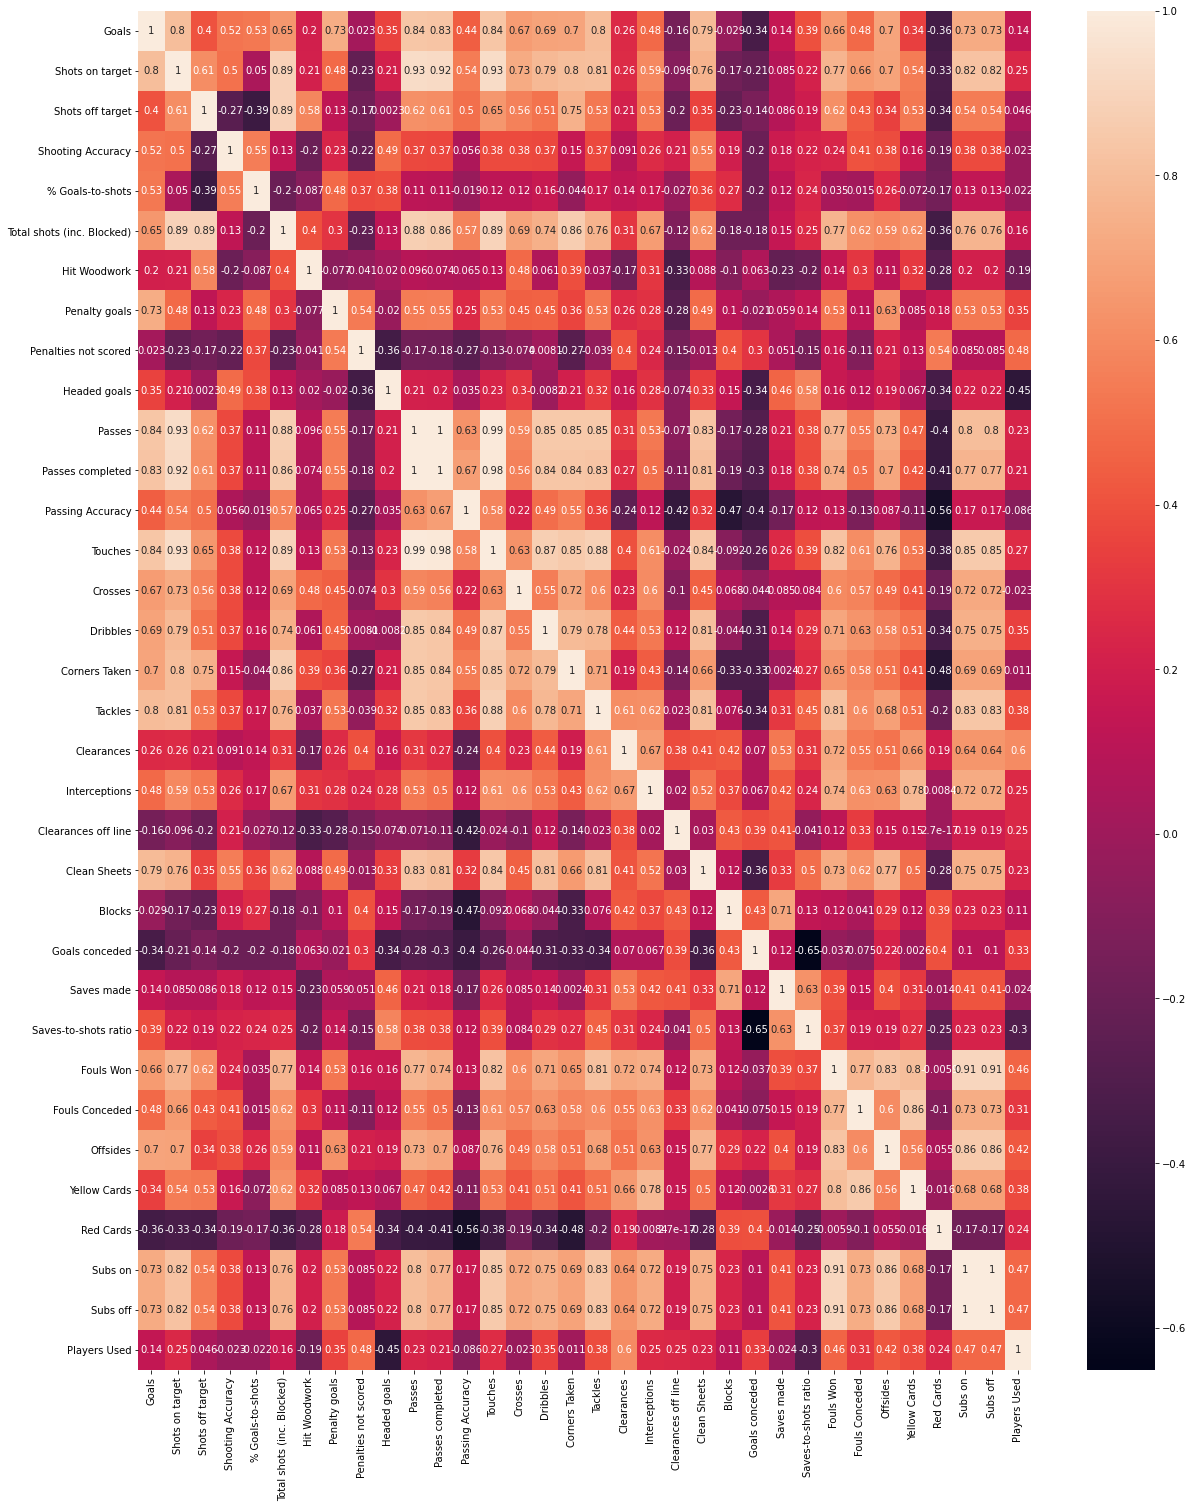

In [44]:
# Matriz de correlación
# ==============================================================================
corr_df = df.corr(method='pearson')

plt.figure(figsize=(20, 25))
sns.heatmap(corr_df, annot=True)
plt.show()

#### Columnas con mayor correlación son: Passes completed  y  Passes   

In [45]:
correlation = df.corr()

sort_correlation = correlation.unstack().sort_values(ascending=False)
sort_correlation[sort_correlation < 1]

Passes completed      Passes                  0.997697
Passes                Passes completed        0.997697
Touches               Passes                  0.993044
Passes                Touches                 0.993044
Passes completed      Touches                 0.984324
                                                ...   
Red Cards             Corners Taken          -0.481090
Passing Accuracy      Red Cards              -0.559696
Red Cards             Passing Accuracy       -0.559696
Goals conceded        Saves-to-shots ratio   -0.650997
Saves-to-shots ratio  Goals conceded         -0.650997
Length: 1120, dtype: float64

##  2 ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

### Regresión Lineal

In [46]:

X = df["Shooting Accuracy"]
y = df["Goals"]

In [47]:

X = np.array(X).reshape(-1,1)
y = np.array(y).reshape(-1,1)


In [48]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

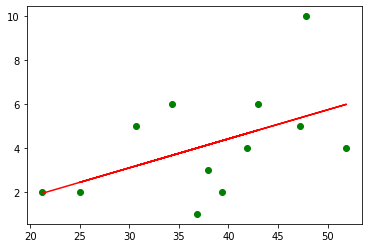

In [49]:
lin_model = LinearRegression(n_jobs=-1)
lin_model.fit(X_train, y_train) 

plt.scatter(X_train, y_train, color='g')
plt.plot(X_train, lin_model.predict(X_train), color='red')
b = lin_model.coef_

In [50]:

print("Por cada acierto de cara a puerta los números de goles marcados aumenta:", b)

Por cada acierto de cara a puerta los números de goles marcados aumenta: [[0.13212143]]


In [51]:
print("Train Score:" ,lin_model.score(X_train, y_train))
print("Test Score:" ,lin_model.score(X_test, y_test))

Train Score: 0.24136568271225323
Test Score: -0.023955188430980545


### Regresión no-lineal con polinomio

In [53]:
degree_min = 2
degree_max = 10
degree_list = list(range(2,11))
train_scores = []
test_scores = []

for degree in degree_list:

    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X, y)

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.20, random_state=101)
    
    poli_model = LinearRegression()
    poli_model.fit(X_train, y_train)
    y_pred = poli_model.predict(X_poly)

    train_scores.append(poli_model.score(X_train, y_train))
    test_scores.append(poli_model.score(X_test, y_test))  

dictionary = {"Degree": degree_list, "Train Scores": train_scores, "Test Scores": test_scores} 

scores = pd.DataFrame(dictionary)
scores

,Degree,Train Scores,Test Scores
0,2,0.243285,0.074827
1,3,0.246439,-0.135191
2,4,0.432955,-6.202989
3,5,0.648421,-37.951764
4,6,0.677925,-5.929528
5,7,0.680149,-88.188693
6,8,0.681347,-7.146295
7,9,0.684274,-50.973936
8,10,0.696661,-828.554398


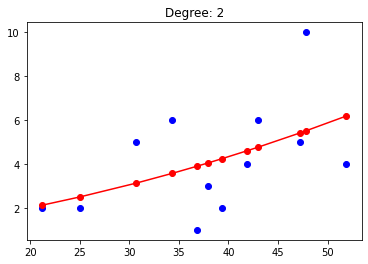

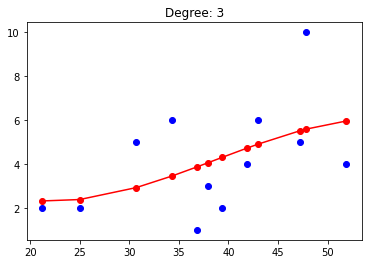

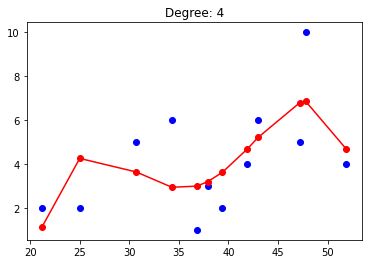

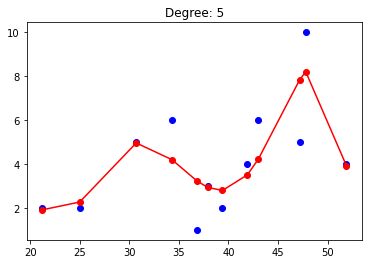

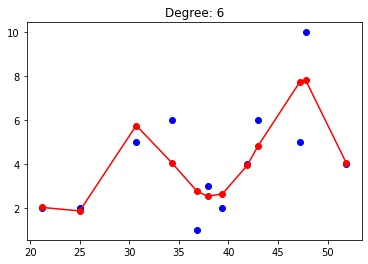

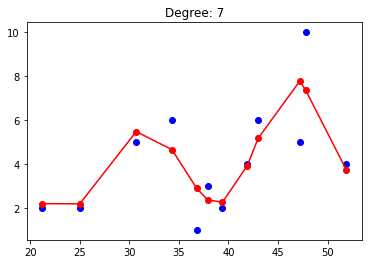

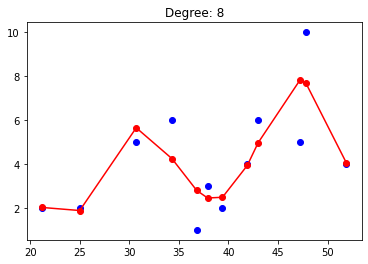

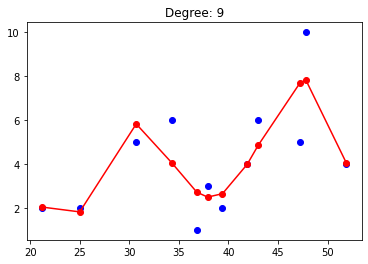

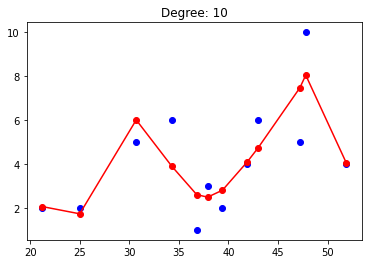

In [56]:
degree_min = 2
degree_max = 10

for degree in range(degree_min,degree_max+1):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

    polinominal_model = PolynomialFeatures(degree) 
    X_poly = polinominal_model.fit_transform(X_train, y_train)

    poli_model = LinearRegression()
    poli_model.fit(X_poly, y_train)
    y_pred = poli_model.predict(X_poly)

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color='b')

    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color='red')
    plt.scatter(X_train_to_show, y_pred, color='red')
    plt.title(f"Degree: {degree}")
    
    plt.show()

In [57]:
gradient = poli_model.coef_.tolist()
gradient_list = [item for sublist in gradient for item in sublist]
gradient_list = gradient_list[2:]


dictionary = {"Degree": degree_list, "Por cada acierto de cara a puerta el número de goles varía": gradient_list} 

gradient_df = pd.DataFrame(dictionary)
gradient_df

,Degree,Por cada acierto de cara a puerta el número de goles varía
0,2,-4.293968e-04
1,3,-5.458284e-03
2,4,-3.565499e-02
3,5,4.832513e-03
4,6,-2.772926e-04
5,7,8.577035e-06
6,8,-1.500955e-07
7,9,1.404590e-09
8,10,-5.480515e-12


### SVR

C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


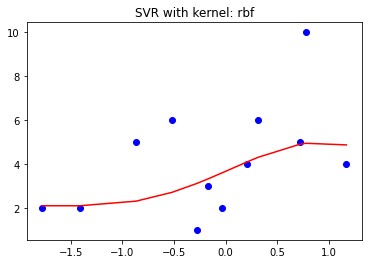

C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


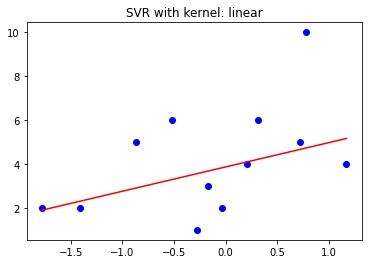

C:\Users\Karina\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
Por cada acierto de cara a puerta el número de goles aumenta [[1.1073292759062952]]


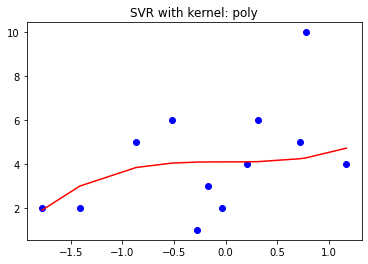

,Kernel,Train Scores,Test Scores
0,rbf,0.195811,-0.788325
1,linear,0.192717,-0.239336
2,poly,0.132305,-0.197024


In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

kernel = ['rbf', 'linear', 'poly']
dictionary_scores = {"column":[], "kernel":[], "score":[]}
train_scores = []
test_scores = []

for k in kernel:
    scalar = StandardScaler()
    scalar.fit(X)  
    X_scaler = scalar.transform(X)  

    X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2, random_state = 101)

    model = SVR(kernel=k, gamma=0.1, C=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

    X_train_to_show, y_train_to_show = zip(*sorted(zip(X_train, y_train)))
    plt.scatter(X_train_to_show, y_train_to_show, color="blue")

    X_train_to_show, y_pred = zip(*sorted(zip(X_train, y_pred)))
    plt.plot(X_train_to_show, y_pred, color="red")
        
    plt.title("SVR with kernel: " + str(k))
    plt.show()

    if k == "linear":
        gradient = model.coef_.tolist()
        print(f"Por cada acierto de cara a puerta el número de goles aumenta {gradient}")

dictionary = {"Kernel": kernel, "Train Scores": train_scores, "Test Scores": test_scores} 

scores = pd.DataFrame(dictionary)
scores


### 3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

### Regresión Logistica

In [62]:
X = df[["% Goals-to-shots", "Total shots (inc. Blocked)", "Corners Taken", "Passes", "Dribbles"]]

In [69]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=15287)

In [70]:
from sklearn.linear_model import LinearRegression
model = linear_model.LogisticRegression(max_iter=9999, solver="liblinear")
model.fit(X_train, y_train)

LogisticRegression(max_iter=9999, solver='liblinear')

In [71]:
print(f"Train Score: {model.score(X_train, y_train)}")
print(f"Test Score: {model.score(X_test, y_test)}") #el modelo esta sobreentrenado 

Train Score: 0.9166666666666666
Test Score: 0.25


In [72]:
model.fit(X,y)
print(f"Whole model score: {model.score(X,y)}")

prediction = np.array([40.0, 102, 5, 82, 23]).reshape(1,-1)
goals = model.predict(prediction)
print(f"El equipo marcaría {goals} goles.")

Whole model score: 0.875
El equipo marcaría [6] goles.


### SVM

In [74]:
clf_model = svm.SVC(C=1, kernel='rbf', gamma=0.1)
clf_model.fit(X_train, y_train)
print(f"Train Score: {clf_model.score(X_train, y_train)}")
print(f"Test Score: {clf_model.score(X_test, y_test)}")

clf_model.fit(X,y)
print(f"Whole model score: {clf_model.score(X,y)}")
prediction = np.array([40.0, 102, 5, 82, 23]).reshape(1,-1)
goals = clf_model.predict(prediction)
print(f"El equipo marcaría {goals} goles.")  #no se puede usar, modelo sobreentrenado

Train Score: 1.0
Test Score: 0.0
Whole model score: 1.0
El equipo marcaría [5] goles.


### Random Forest

In [75]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=1587921)
rf_model.fit(X_train, y_train)

print(f"Train Score: {rf_model.score(X_train, y_train)}")
print(f"Test Score: {rf_model.score(X_test, y_test)}")

rf_model.fit(X,y)
print(f"Whole model score: {rf_model.score(X,y)}")
prediction = np.array([40.0, 102, 5, 82, 23]).reshape(1,-1)
goals = rf_model.predict(prediction)
print(f"El equipo marcaría {int(goals)} goles.") # el modelo no sirve

Train Score: 0.9486486413043478
Test Score: 0.07790000000000008
Whole model score: 0.9533872
El equipo marcaría 5 goles.
